# Observations and Findings
##### The purpose of this study is to answer a fundamental question:"What's the weather like as we approach the equator?"
##### A Python Script was create to visualize the weather of 500+ cities across the world of varying distance from the equator.
##### We use Python library and the OpenWeatherMap API to call the cities and the respective weather conditions to do the analysis.
##### Scatter Plot was use to visualize how the weather variables (Max Temp, Humidity, Cloudiness and Wind Speed) were affected by the ciites location (Latitude) and the relationship between the variables.
##### Linear Regression was use to establish the correlation between the weather variables and the cities locations.
##### **Findings:**
##### * For the cities located in the Norther Hemisphere:
#####     1. Temperature vs Latitud - There is a moderately strong     negative linear relationship between Latitude and Max Temperature. With a r-square of 0.39 we can account 39% of the Temperature variability deppends of Latitude. 
#####     2. Humidity vs Latitud - There is a very weak negative relationship between Latitude and Humidity. With a r-square of 0.0003 we can account 0.03% of the Humidity variability deppends of Latitude.
#####     3. Cloudiness vs Latitud - There is a very weak negative relationship between Latitude and Cloudiness. With a r-square of 0.002 we can account 0.2% of the Cloudiness variability deppends of Latitude. 
#####     4. Wind Speed vs Latitud - There is a very weak negative relationship between Latitude and Wind Speed. With a r-square of 0.006 we can account 0.6% of the Wind Speed variability deppends of Latitude. 
##### * For the cities located in the Souther Hemisphere:
#####     1. Temperature vs Latitud - There is a moderately strong positive linear relationship between Latitude and Max Temperature. With a r-square of 0.60 we can account 60% of the Temperature variability deppends of Latitude.
#####     2. Humidity vs Latitud - There is a very weak negative relationship between Latitude and Humidity. With a r-square of 0.01 we can account 1% of the Humidity variability deppends of Latitude.
#####     3. Cloudiness vs Latitud - There is a very weak negative relationship between Latitude and Cloudiness. With a r-square of 0.008 we can account 0.8% of the Cloudiness variability deppends of Latitude.
#####     4. Wind Speed vs Latitud - There is a very weak positive relationship between Latitude and Wind Speed. With a r-square of 0.038 we can account 3.8% of the Wind Speed variability deppends of Latitude.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
       cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + '&units=imperial' +"&q=" + city   
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + weather_api_key + '&units=imperial' +"&q=" + city   
#query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
#Lists 
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
count=0



In [6]:
print("Beginning Data Retrieval")
print("-----------------------------")
#Loop throug each city
for city in cities:
    count=count+1
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + '&units=imperial' +"&q=" + city  
    weather_response = requests.get(query_url)
    weather_json=weather_response.json()
    try:
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        
        print(f"Processing Record {count} of Set 1 | {city}")
     # Handle exceptions for a record not found
    except: 
        print("Record not found")
        pass
            
   # time.sleep(60)        
            
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
           
        
    
        
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | kondol
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | palatka
Record not found
Processing Record 10 of Set 1 | nalut
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | puerto ayora
Record not found
Processing Record 14 of Set 1 | sorland
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | garissa
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | vuktyl
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | muroto
Processing Record 22 of Set 1 | chokurdakh
Processing Record 23 of Set 1 | punta arenas
Record not found
Processing Record 25 of Set 1 | bredasdorp
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Turn into dictionary
city_weather_dict={'City':city_name,
                   'Cloudiness':cloudiness,
                   'Country':country,
                   'Date':date,
                   'Humidity':humidity,
                   'Lat':lat,
                   'Lng':lng,
                   'Max Temp': max_temp,
                   'Wind Speed':wind_speed
                   }
city_weather_df=pd.DataFrame(city_weather_dict)
#count the DataFrame
city_weather_df.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

In [8]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lebu,100,CL,1595252456,90,-37.62,-73.65,50.63,9.28
1,Kondol',11,RU,1595252456,28,52.82,45.06,79.00,12.41
2,Busselton,100,AU,1595252456,58,-33.65,115.33,51.01,9.08
3,Yellowknife,40,CA,1595252217,100,62.46,-114.35,64.99,2.24
4,Vaini,40,TO,1595252456,88,-21.20,-175.20,71.60,10.29


In [9]:
#export the city data into a csv
city_weather_df.to_csv("city_weather.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_weather_df[city_weather_df.Humidity>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

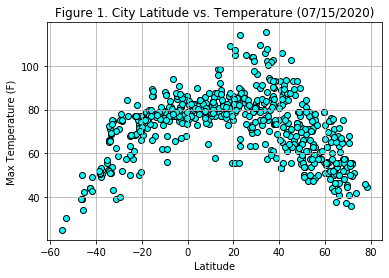

In [11]:
#Scatter Plot for Latitude vs Temperature
latitude=city_weather_df["Lat"]
temperature=city_weather_df["Max Temp"]

plt.scatter(latitude,temperature,marker="o",facecolors="aqua",edgecolors="black")
plt.title('Figure 1. City Latitude vs. Temperature (07/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Scatterplot_Latitude_MaxTemp')
plt.grid()
plt.show()

###### The Scatter Plot was use to plot the data points on a horizontal and a vertical axis in the attempt to show how much the variables Latitude and Max Temperature affected each other.

###### Figure 1, City Latitude vs Temperature Scatter Plot shows a non linear relationship form. 
###### We can see a strong no linear relashionship between Latitude and Temperature.

## Latitude vs. Humidity Plot

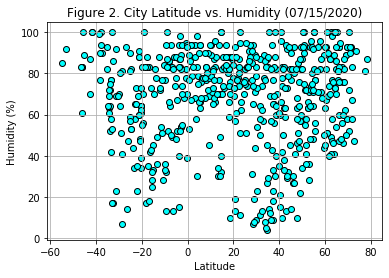

In [25]:
latitude=city_weather_df["Lat"]
humidity=city_weather_df["Humidity"]

plt.scatter(latitude,humidity,marker="o",facecolors="aqua",edgecolors="black")
plt.title('Figure 2. City Latitude vs. Humidity (07/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Scatterplot_Latitude_Humidity')
plt.show()

###### The Scatter Plot was use to plot the data points on a horizontal and a vertical axis in the attempt to show how much the variables Latitude and Humidity affected each other.
###### Figure 2, City Latitude vs Humidity Scatter Plot shows a non linear weak relationship between Latitude an Humidity. 



## Latitude vs. Cloudiness Plot

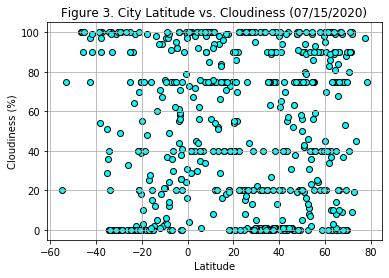

In [27]:
latitude=city_weather_df["Lat"]
cloudiness=city_weather_df["Cloudiness"]

plt.scatter(latitude,cloudiness,marker="o",facecolors="aqua",edgecolors="black")
plt.title('Figure 3. City Latitude vs. Cloudiness (07/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Scatterplot_Latitude_Cloudiness')
plt.show()

###### The Scatter Plot was use to plot the data points on a horizontal and a vertical axis in the attempt to show how much the variables Latitude and Cloudiness affected each other.
###### Figure 3, City Latitude vs Cloudiness Scatter Plot shows a non linear, weak relationship between Latitude and Cloudiness. 


## Latitude vs. Wind Speed Plot

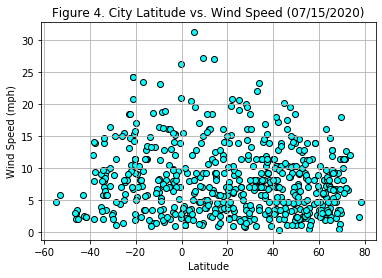

In [28]:
latitude=city_weather_df["Lat"]
wind_speed=city_weather_df["Wind Speed"]

plt.scatter(latitude,wind_speed,marker="o",facecolors="aqua",edgecolors="black")
plt.title('Figure 4. City Latitude vs. Wind Speed (07/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Scatterplot_Latitude_Wind Speed')
plt.show()

###### The Scatter Plot was use to plot the data points on a horizontal and a vertical axis in the attempt to show how much the variables Latitude and Wind Speed affected each other.
###### Figure 3, City Latitude vs Wind Speed Scatter Plot shows a non linear, weak relationship between Latitude and Wind Speed. 


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
#Nothern Hemisphere (Lat >=0)
northern_hemisphere=city_weather_df[city_weather_df['Lat']>0]
#Southern Hemisphere (Lat<0)
southern_hemisphere=city_weather_df[city_weather_df['Lat']<0]

The correlation for Max Temp vs. Latitude for the Northern Hemisphere is -0.62
The r-squared is:0.3866474609392146


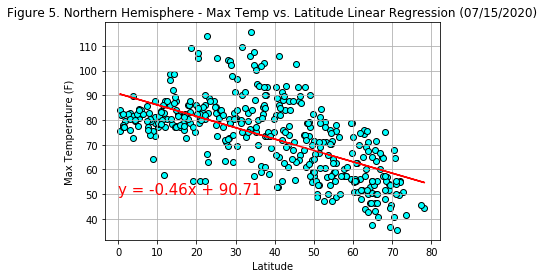

In [30]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Figure 5. Northern Hemisphere - Max Temp vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])
print(f"The correlation for Max Temp vs. Latitude for the Northern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Max Temperature and Latitude for the cities in the Nothern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Max Temperature and Latitude may have a negative linear relationship.
###### With a Correlation Coefficient of -0.62 we can conclude there is a moderately strong negative linear relationship between Latitude and Max Temperature.
###### With a r-square of 0.39 we can account 39% of the Temperature variability deppends of Latitude for the cities in the Nothern Hemisphere.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation for Max Temp vs. Latitude for the Southern Hemisphere is 0.78
The r-squared is:0.6022885834937891


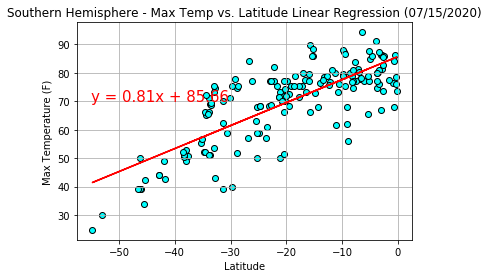

In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
print(f"The correlation for Max Temp vs. Latitude for the Southern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Max Temperature and Latitude for the cities in the Southern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Max Temperature and Latitude may have a positive linear relationship.
###### With a Correlation Coefficient of 0.78 we can conclude there is a moderately strong positive linear relationship between Latitude and Max Temperature.
###### With a r-square of 0.60 we can account 60% of the Temperature variability deppends of Latitude for the cities in the Southern Hemisphere.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation for Humidity (%) vs. Latitude for the Northern Hemisphere is -0.02
The r-squared is:0.00033033959607399807


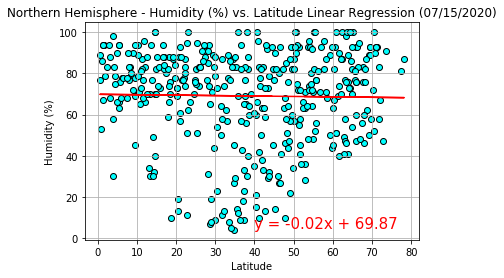

In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])
print(f"The correlation for Humidity (%) vs. Latitude for the Northern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Humidity and Latitude for the cities in the Northern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Humidity and Latitude may have a negative non linear relashionship.
###### With a Correlation Coefficient of -0.02 we can conclude there is a very weak negative relationship between Latitude and Humidity.
###### With a r-square of 0.0003 we can account 0.03% of the Humidity variability deppends of Latitude for the cities in the Northern Hemisphere.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation for Humidity (%) vs. Latitude for the Southern Hemisphere is -0.1
The r-squared is:0.009564597875399972


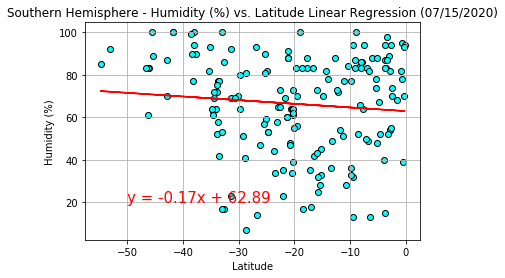

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
print(f"The correlation for Humidity (%) vs. Latitude for the Southern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Humidity and Latitude for the cities in the Southern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Humidity and Latitude may have a very weak negative relashionship.
###### With a Correlation Coefficient of -0.01 we can conclude there is a very weak negative relationship between Latitude and Humidity.
###### With a r-square of 0.01 we can account 1% of the Humidity variability deppends of Latitude for the cities in the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation for Cloudiness (%) vs. Latitude for the Northern Hemisphere is -0.04
The r-squared is:0.0019226827529389154


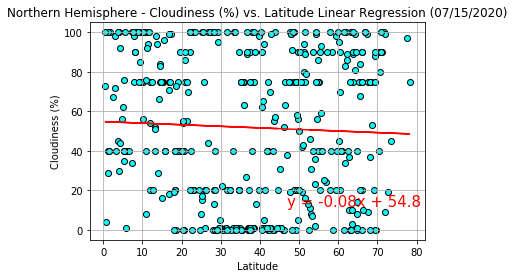

In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,12),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])
print(f"The correlation for Cloudiness (%) vs. Latitude for the Northern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Cloudiness and Latitude for the cities in the Northern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Cloudiness and Latitude may have a very weak negative relashionship.
###### With a Correlation Coefficient of -0.04 we can conclude there is a very weak negative relationship between Latitude and Cloudiness.
###### With a r-square of 0.002 we can account 0.2% of the Cloudiness variability deppends of Latitude for the cities in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation for Cloudiness (%) vs. Latitude for the Southern Hemisphere is -0.09
The r-squared is:0.008169672269949151


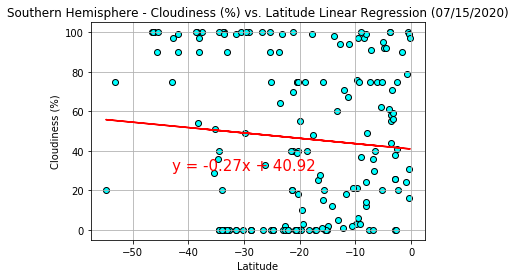

In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-43,30),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
print(f"The correlation for Cloudiness (%) vs. Latitude for the Southern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Cloudiness and Latitude for the cities in the Southern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Cloudiness and Latitude may have a very weak negative relashionship.
###### With a Correlation Coefficient of -0.09 we can conclude there is a very weak negative relationship between Latitude and Cloudiness.
###### With a r-square of 0.008 we can account 0.8% of the Cloudiness variability deppends of Latitude for the cities in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation for Wind Speed (mph) vs. Latitude for the Northern Hemisphere is -0.08
The r-squared is:0.006385196212497711


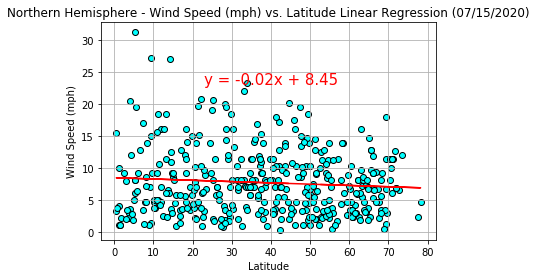

In [23]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(23,23),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])
print(f"The correlation for Wind Speed (mph) vs. Latitude for the Northern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Wind Speed and Latitude for the cities in the Northern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Wind Speed and Latitude may have a very weak negative relashionship.
###### With a Correlation Coefficient of -0.08 we can conclude there is a very weak negative relationship between Latitude and Wind Speed.
###### With a r-square of 0.006 we can account 0.6% of the Wind Speed variability deppends of Latitude for the cities in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation for Wind Speed (mph) vs. Latitude for the Southern Hemisphere is 0.19
The r-squared is:0.037922724580571394


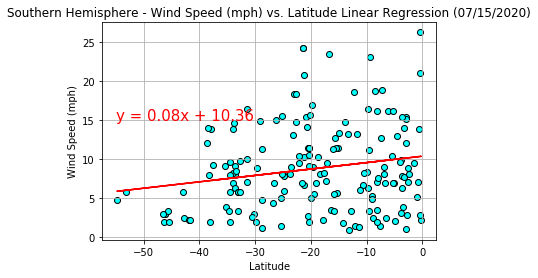

In [24]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="aqua",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/15/2020)')
correlation = st.pearsonr(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
print(f"The correlation for Wind Speed (mph) vs. Latitude for the Southern Hemisphere is {round(correlation[0],2)}")
print(f"The r-squared is:{rvalue**2}")
plt.show()

###### Linear Regression Plot was use explain the Relationship between Wind Speed and Latitude for the cities in the Southern Hemisphere. A single line was fit through a scatter plot defined by the formula y=a*x + b
###### With the Scatter Plot and the Linear Regression we can see the Wind Speed and Latitude may have a very weak positive relashionship.
###### With a Correlation Coefficient of 0.19 we can conclude there is a very weak positive relationship between Latitude and Wind Speed.
###### With a r-square of 0.038 we can account 3.8% of the Wind Speed variability deppends of Latitude for the cities in the Northern Hemisphere.